In [2]:
#Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [4]:
#Importing the dataset

df = pd.read_csv('./Mall_Customers.csv')

In [5]:
#Exploring the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
#Checking for Categorial values

df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [9]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [10]:
#Feature Scaling

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

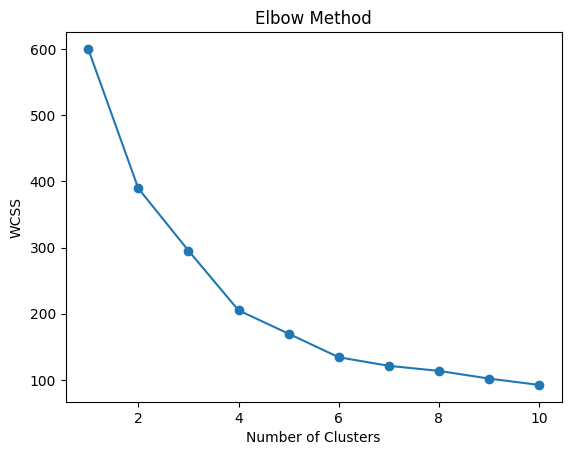

In [11]:
#Elbow method for finding the K

import os
os.environ["OMP_NUM_THREADS"] = "1"

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [12]:
#K-Means Clustering

kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df['Cluster'] = clusters

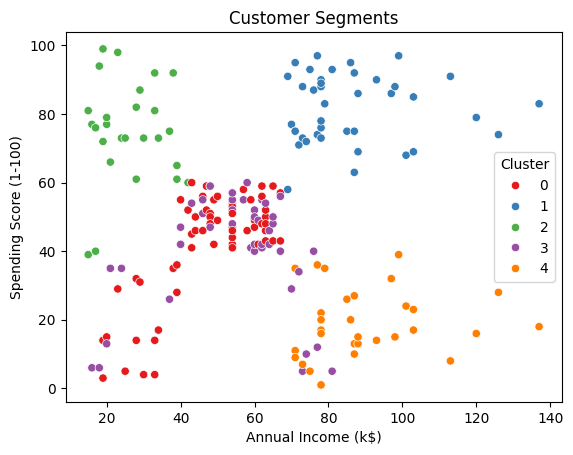

In [13]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Cluster', data=df, palette='Set1')
plt.title('Customer Segments')
plt.show()

In [14]:
df.groupby('Cluster').mean()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,,
0,68.775862,0.568966,55.275862,47.620690,41.706897
1,161.025000,0.550000,32.875000,86.100000,81.525000
2,23.461538,0.576923,25.769231,26.115385,74.846154
3,86.377778,0.600000,26.733333,54.311111,40.911111
4,166.870968,0.483871,44.387097,89.774194,18.483871
